# 1. svg 生成 png

In [1]:
from wand.image import Image
from wand.display import display

# 导入 svg 图片并存成 png 格式
input_file = 'data/airplane/1.svg'
output_file = 'data/1.png'

with Image(filename=input_file) as img:
    img.resize(224, 224)
    img.save(filename=output_file)

### 查看生成的图片

In [2]:
import PIL.Image as pimg
import numpy as np

(224, 224, 2)


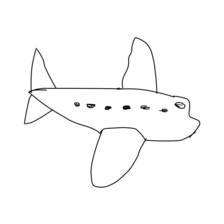

In [3]:
img = pimg.open(output_file)
# img = img.resize((224,224))
_img = np.asarray(img)
print(_img.shape)
img

# 2. 解析 svg 笔画路径序列

In [11]:
import tools as myTools
from svg.path import parse_path

import numpy as np
from xml.dom import minidom
import time

In [9]:
org_off_set_flag = False  # True:prints original cordinate/offsets, False: prints sampled coodinates.


def svg_to_np(svg_file_name, sample_len = 20):
    svg_file = minidom.parse(svg_file_name)
    pathList = svg_file.getElementsByTagName("path")
    xcoord = []
    ycoord = []
    pcoord = []
    for pathIdx, pathEle in enumerate(pathList):
        mypath = parse_path(pathEle.attributes["d"].value)
        # len(mypath)...number of offsets/segments
        try:
            mypathLen = int(mypath.length())  # strokeLen...nactual length of the whole stroke
        except ZeroDivisionError:
            mypathLen = 0
        if org_off_set_flag:
            xcoord.append(mypath[0].start.real)
            ycoord.append(mypath[0].start.imag)
            pcoord.append(0.0)
            for offsetIdx in range(len(mypath)):
                xcoord.append(mypath[offsetIdx].end.real)
                ycoord.append(mypath[offsetIdx].end.imag)
                pcoord.append(0.0)
            pcoord[-1] = 1.0
        else:
            if mypathLen < sample_len:
                continue
            maxIter = mypathLen / sample_len
            x = 0.0
            for i in range(int(maxIter)):
                xcoord.append(mypath.point(x).real)
                ycoord.append(mypath.point(x).imag)
                pcoord.append(0.0)
                x = np.float32(x + (1 / maxIter))
            xcoord.append(mypath.point(1.0).real)
            ycoord.append(mypath.point(1.0).imag)
            pcoord.append(1.0)
    image_coord = np.column_stack((np.asarray(xcoord), np.asarray(ycoord), np.asarray(pcoord)))
    return image_coord

In [10]:
svg_file = 'data/airplane/1.svg'
image_coord = svg_to_np(svg_file)
image_coord = image_coord.astype('int')
print(image_coord.shape)
print(image_coord)

(125, 3)
[[167 268   0]
 [183 258   0]
 [206 257   0]
 [223 257   0]
 [243 259   0]
 [265 283   1]
 [171 264   0]
 [168 271   0]
 [161 290   0]
 [153 315   0]
 [147 342   0]
 [146 359   0]
 [149 381   0]
 [165 388   0]
 [186 384   0]
 [202 376   0]
 [217 363   0]
 [232 347   0]
 [242 332   0]
 [251 313   0]
 [268 282   1]
 [168 272   0]
 [151 260   0]
 [132 253   0]
 [115 248   0]
 [ 95 239   0]
 [ 76 227   0]
 [ 61 219   0]
 [ 43 206   0]
 [ 21 189   0]
 [  9 179   1]
 [265 285   0]
 [272 285   0]
 [293 286   0]
 [319 286   0]
 [345 284   0]
 [376 267   1]
 [  9 179   0]
 [ 48 175   1]
 [ 10 180   0]
 [ 29 172   0]
 [ 47 170   0]
 [ 73 170   0]
 [102 170   0]
 [130 171   0]
 [156 171   0]
 [178 171   0]
 [196 171   0]
 [208 171   0]
 [214 172   1]
 [204 173   0]
 [213 172   0]
 [236 172   0]
 [265 174   0]
 [293 180   0]
 [315 185   0]
 [329 190   1]
 [216 170   0]
 [216 149   0]
 [224 133   0]
 [229 112   0]
 [234  94   0]
 [237  73   0]
 [247  60   0]
 [265  70   0]
 [277  85   0]
 

In [13]:
svg_file = 'data/airplane/1.svg'
image_coord = svg_to_np(svg_file, sample_len=10)
image_coord = image_coord.astype('int')
print(image_coord.shape)
print(image_coord)

(243, 3)
[[167 268   0]
 [173 260   0]
 [183 258   0]
 [196 258   0]
 [206 257   0]
 [214 257   0]
 [223 257   0]
 [232 258   0]
 [243 259   0]
 [250 265   0]
 [259 275   0]
 [265 283   1]
 [171 264   0]
 [170 265   0]
 [168 271   0]
 [164 279   0]
 [161 290   0]
 [157 302   0]
 [153 315   0]
 [149 329   0]
 [147 342   0]
 [146 351   0]
 [146 359   0]
 [147 369   0]
 [149 381   0]
 [155 386   0]
 [165 388   0]
 [175 388   0]
 [186 384   0]
 [195 380   0]
 [202 376   0]
 [209 370   0]
 [217 363   0]
 [226 354   0]
 [232 347   0]
 [237 340   0]
 [242 332   0]
 [248 321   0]
 [251 313   0]
 [255 303   0]
 [262 291   0]
 [268 282   1]
 [168 272   0]
 [162 267   0]
 [151 260   0]
 [140 255   0]
 [132 253   0]
 [124 251   0]
 [115 248   0]
 [103 243   0]
 [ 95 239   0]
 [ 87 234   0]
 [ 76 227   0]
 [ 68 223   0]
 [ 61 219   0]
 [ 54 213   0]
 [ 43 206   0]
 [ 31 197   0]
 [ 21 189   0]
 [ 13 183   0]
 [  9 179   1]
 [265 285   0]
 [267 285   0]
 [272 285   0]
 [281 286   0]
 [293 286   0]
 

In [7]:
# 对比一下 svg 的 xml 代码
with open(svg_file, 'r') as inp:
    svg_text = inp.read()
    print(svg_text)

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg viewBox="0 0 800 800" preserveAspectRatio="xMinYMin meet" xmlns="http://www.w3.org/2000/svg" version="1.1">
<g fill="none" stroke="black" stroke-linecap="round" stroke-linejoin="round" stroke-width="1.8481">
<g transform="translate(87.52,135.4065) scale(1.6233) translate(0,-60)">
<path id="0" d="M167 268 C167 268 169.3665 263.4813 172 262 C175.9896 259.7559 177.6387 259.2365 183 259 C210.4512 257.7889 216.727 256.0078 240 259 C245.7803 259.7432 247.6027 262.8186 253 268 C259.5845 274.3211 265 283 265 283 "/>
<path id="1" d="M171 264 C171 264 156.0157 299.1415 149 333 C144.9744 352.4277 146.294 356.9169 148 375 C148.4708 379.991 151.6471 385.2605 154 386 C161.2152 388.2676 172.6028 390.1283 183 386 C200.8261 378.922 205.9707 374.266 222 359 C235.7293 345.9245 235.8428 342.9286 246 326 C251.8714 316.2143 249.7558 314.4885 255 304 C260.64 292.72 26